<a href="https://colab.research.google.com/github/mbk-dev/okama/blob/master/notebooks/01%20howto.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [1]:
!pip install okama

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 6.0]

import okama as ok

## Get information about a single asset

You can start with getting general information about a single asset / index.

In [3]:
one_asset = ok.Asset('VOO.US')
one_asset

symbol                         VOO.US
name             Vanguard S&P 500 ETF
country                           USA
exchange                    NYSE ARCA
currency                          USD
type                              ETF
first date                    2010-10
last date                     2021-08
period length                    10.8
dtype: object

In [4]:
# live (20 min delay) price
one_asset.price

409.92

In [5]:
#dividends history
one_asset.dividends.tail(10)

Date
2020-09    1.3085
2020-10    0.0000
2020-11    0.0000
2020-12    1.3829
2021-01    0.0000
2021-02    0.0000
2021-03    1.2625
2021-04    0.0000
2021-05    0.0000
2021-06    1.3329
Freq: M, Name: VOO.US, dtype: float64

If you doubt about ticker availability or asset name, check it with `search`:

In [6]:
ok.search('exxon')

[['XOM.US',
  'XOM',
  'Exxon Mobil Corporation',
  'USA',
  'NYSE',
  'USD',
  'Common Stock'],
 ['XONA.XETR',
  'XONA',
  'Exxon Mobil Corporation',
  'Germany',
  'XETR',
  'EUR',
  'Common Stock'],
 ['XONA.XFRA',
  'XONA',
  'Exxon Mobil Corporation',
  'Germany',
  'XFRA',
  'EUR',
  'Common Stock'],
 ['XONA.XSTU',
  'XONA',
  'EXXON MOBIL (XONA.SG)',
  'Germany',
  'XSTU',
  'EUR',
  'Common Stock']]

## Namespaces

Namespaces are based on MIC (Market Identifier Codes) and okama own code systems for macro parameters.

In [7]:
# available namespaces
ok.namespaces

{'CBR': 'Central Banks official currency exchange rates',
 'CC': 'Cryptocurrency pairs with USD',
 'COMM': 'Commodities prices',
 'FX': 'FOREX currency market',
 'INDX': 'Indexes',
 'INFL': 'Inflation',
 'LSE': 'London Stock Exchange',
 'MOEX': 'Moscow Exchange',
 'PIF': 'Russian mutual funds',
 'RATE': 'Bank deposit rates',
 'RE': 'Real estate prices',
 'US': 'US Stock Exchanges and mutual funds',
 'XAMS': 'Euronext Amsterdam',
 'XETR': 'XETRA Exchange',
 'XFRA': 'Frankfurt Stock Exchange',
 'XSTU': 'Stuttgart Exchange'}

In [8]:
# available symbols in namespace
ok.symbols_in_namespace('INDX')

,symbol,ticker,name,country,exchange,currency,type
0,000906.INDX,000906,CHINA SECURITIES INDEX 800,Unknown,INDX,USD,INDEX
1,0O7N.INDX,0O7N,SCALE ALL SHARE GR EUR,Germany,INDX,EUR,INDEX
2,3LHE.INDX,3LHE,ESTX 50 CORPORATE BOND TR,Greece,INDX,EUR,INDEX
3,5SP2550.INDX,5SP2550,S&P 500 RETAILING INDEX,USA,INDX,USD,INDEX
4,990100.INDX,990100,MSCI International World Index Price,Unknown,INDX,USD,INDEX
...,...,...,...,...,...,...,...
662,XNG.INDX,XNG,ARCA Natural Gas,USA,INDX,USD,INDEX
663,XOI.INDX,XOI,ARCA Oil,USA,INDX,USD,INDEX
664,XU030.INDX,XU030,BIST 30,Turkey,INDX,TRY,INDEX
665,XU100.INDX,XU100,BIST 100,Turkey,INDX,TRY,INDEX


## Compare several assets from different stock markets

`AssetList` is used to compare different type of stocks, indexes, currencies, or commodities. Asset performance is adjusted to the **base currency** (USD is default).

In [9]:
ls = ['SPY.US', 'BND.US', 'GC.COMM', 'EUR.FX']
currency = 'EUR'  # base currency

In [10]:
x = ok.AssetList(ls, ccy=currency, last_date='2020-01')  # first_date and last_date limits the Rate of Return time series
x

assets           [SPY.US, BND.US, GC.COMM, EUR.FX]
currency                                       EUR
first_date                                 2007-05
last_date                                  2020-01
period_length                   12 years, 9 months
inflation                                 EUR.INFL
dtype: object

In [11]:
x.names

{'SPY.US': 'SPDR S&P 500 ETF Trust',
 'BND.US': 'Vanguard Total Bond Market Index Fund ETF Shares',
 'GC.COMM': 'Gold',
 'EUR.FX': 'EUR'}

lets see the accumulated return and comapare it with the inflation.

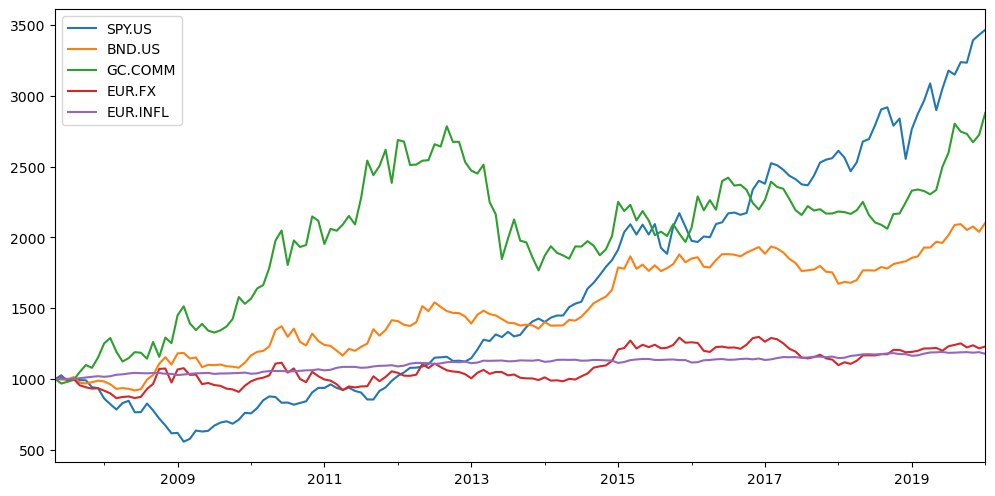

In [12]:
x.wealth_indexes.plot();

Drawdowns history is availably and easy to see

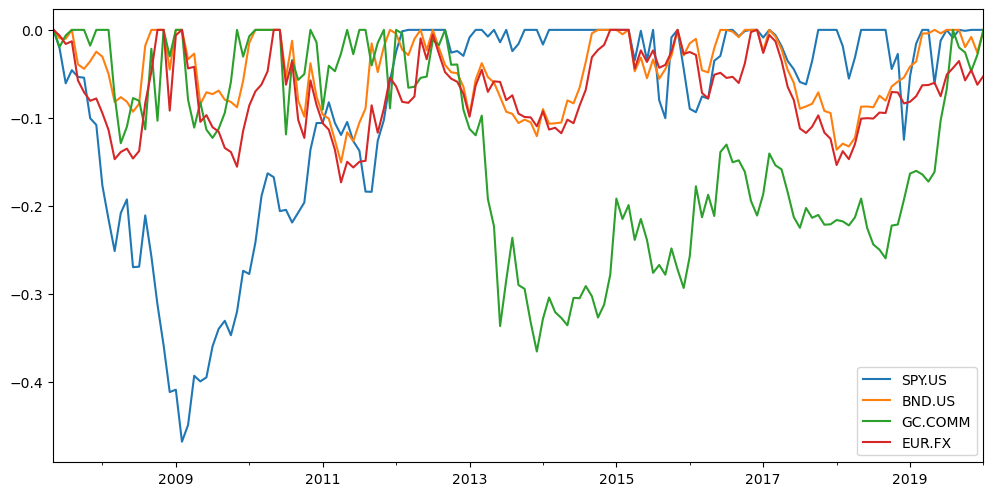

In [13]:
x.drawdowns.plot();

See the dividend yield history for all the assets in the list.

In [14]:
x.assets_dividend_yield

,SPY.US,BND.US,GC.COMM,EUR.FX
2007-05,0.000000,0.001699,0.0,0.0
2007-06,0.004358,0.005189,0.0,0.0
2007-07,0.004543,0.008332,0.0,0.0
2007-08,0.004471,0.012238,0.0,0.0
2007-09,0.009239,0.016673,0.0,0.0
...,...,...,...,...
2019-09,0.017920,0.026580,0.0,0.0
2019-10,0.017939,0.027181,0.0,0.0
2019-11,0.017102,0.026875,0.0,0.0
2019-12,0.017516,0.027322,0.0,0.0


... or plot the same results

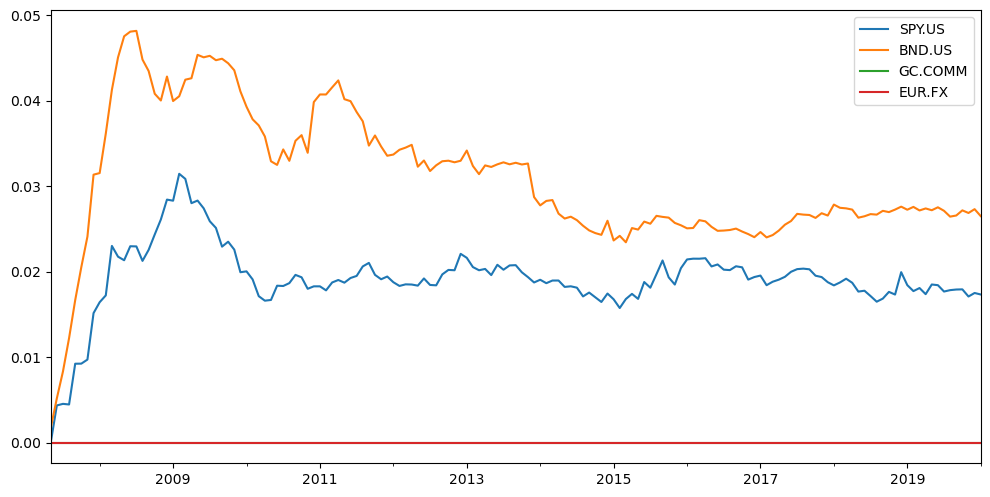

In [15]:
x.assets_dividend_yield.plot();

_describe_ method shows all the main parameters (risk metrics, rate of return etc.) for the list of assets.

In [16]:
x.describe(years=[1, 10])  # You can specify the period or leave the default: 1, 5 and 10 years

,property,period,BND.US,EUR.FX,GC.COMM,SPY.US,inflation
0,Compound return,YTD,0.030712,0.010700,0.056990,0.010296,-0.010000
1,CAGR,1 years,0.132887,0.031992,0.235531,0.253479,0.011915
2,CAGR,10 years,0.060618,0.022543,0.062663,0.164232,0.012802
3,CAGR,"12 years, 9 months",0.060013,0.016364,0.086480,0.102403,0.012940
4,Dividend yield,LTM,0.026509,0.000000,0.000000,0.017338,NaN
5,Risk,"12 years, 9 months",0.107615,0.105235,0.194223,0.150558,NaN
6,CVAR,"12 years, 9 months",0.127888,0.155073,0.303712,0.331293,NaN
7,Max drawdowns,"12 years, 9 months",-0.150754,-0.173337,-0.365609,-0.468101,NaN
8,Max drawdowns dates,"12 years, 9 months",2011-04,2011-04,2013-12,2009-02,NaN
9,Inception date,None,2007-05,2000-01,1979-01,1993-02,2007-05


#### Correlation Matrix

If you need to check the correlation (or covariance) between assets returns, it's easy to use native Pandas functions.

Monthly rate of return time series are available with `.assets_ror` property:

In [17]:
x.assets_ror

,SPY.US,BND.US,GC.COMM,EUR.FX
2007-05,0.048581,0.006188,-0.012575,0.0142
2007-06,-0.021005,-0.009580,-0.019415,-0.0065
2007-07,-0.040600,-0.000488,0.013278,-0.0096
2007-08,0.015940,0.017946,0.012930,0.0031
2007-09,-0.008042,-0.039175,0.055943,-0.0450
...,...,...,...,...
2019-09,0.028064,0.002652,-0.020037,0.0084
2019-10,-0.001102,-0.019670,-0.005793,-0.0227
2019-11,0.048945,0.011895,-0.021713,0.0123
2019-12,0.011194,-0.018088,0.019349,-0.0174


The correlation matrix is obtained by `x.ror.corr()`

In [18]:
x.assets_ror.corr()

,SPY.US,BND.US,GC.COMM,EUR.FX
SPY.US,1.000000,0.196963,-0.085213,0.251952
BND.US,0.196963,1.000000,0.336050,0.936992
GC.COMM,-0.085213,0.336050,1.000000,0.223800
EUR.FX,0.251952,0.936992,0.223800,1.000000


Covariance matrix:

In [19]:
x.assets_ror.cov()

,SPY.US,BND.US,GC.COMM,EUR.FX
SPY.US,0.001541,0.000226,-0.000170,0.000294
BND.US,0.000226,0.000855,0.000500,0.000814
GC.COMM,-0.000170,0.000500,0.002590,0.000338
EUR.FX,0.000294,0.000814,0.000338,0.000883


Rolling correlation with the benchmark is useful to see the correlation patterns for shorter periods.  
The benchmark (index) should be on the first place in the AssetList (SPY.US in this example).

<AxesSubplot:>

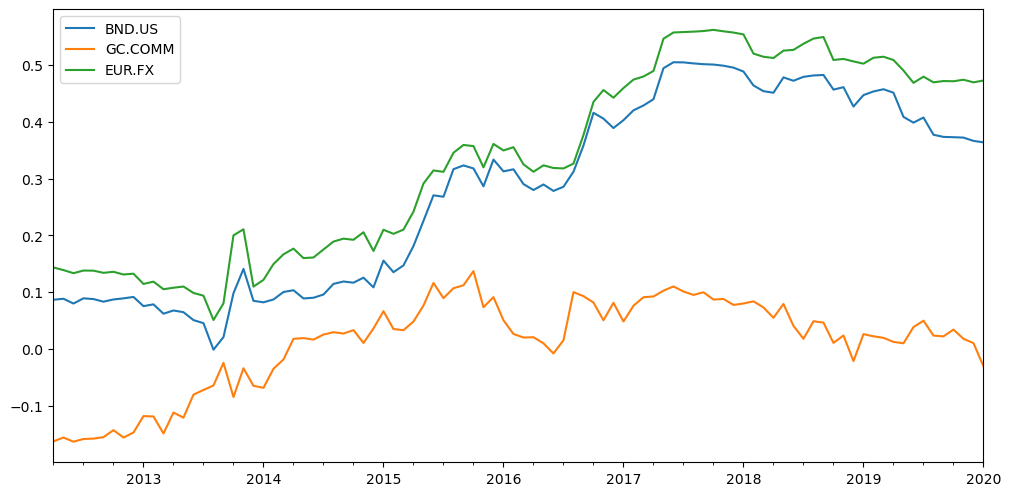

In [20]:
x.index_rolling_corr(window=12*5).plot()

## Basic portfolio methods

Lets create a portfolio with 3 assets and base currency USD. We need to specify weigts.

In [21]:
tickers = ['VNQ.US', 'DBXD.XETR', 'MCFTR.INDX']  # we can create lists of assets and portfolio containing general type of assets and **indexes**
w = [0.5, 0.25, 0.25]
currency = 'USD'

In [22]:
y = ok.Portfolio(tickers, ccy=currency, weights=w)
y

symbol                              portfolio_8873.PF
assets                [VNQ.US, DBXD.XETR, MCFTR.INDX]
weights                             [0.5, 0.25, 0.25]
rebalancing_period                              month
currency                                          USD
inflation                                    USD.INFL
first_date                                    2007-02
last_date                                     2021-06
period_length                      14 years, 5 months
dtype: object

In [23]:
y.table

,asset name,ticker,weights
0,Vanguard Real Estate Index Fund ETF Shares,VNQ.US,0.50
1,Xtrackers DAX UCITS ETF 1C,DBXD.XETR,0.25
2,MOEX Total Return,MCFTR.INDX,0.25


Portfolio has the same property `.wealth_index` (accumulated return) as AssetList objects.

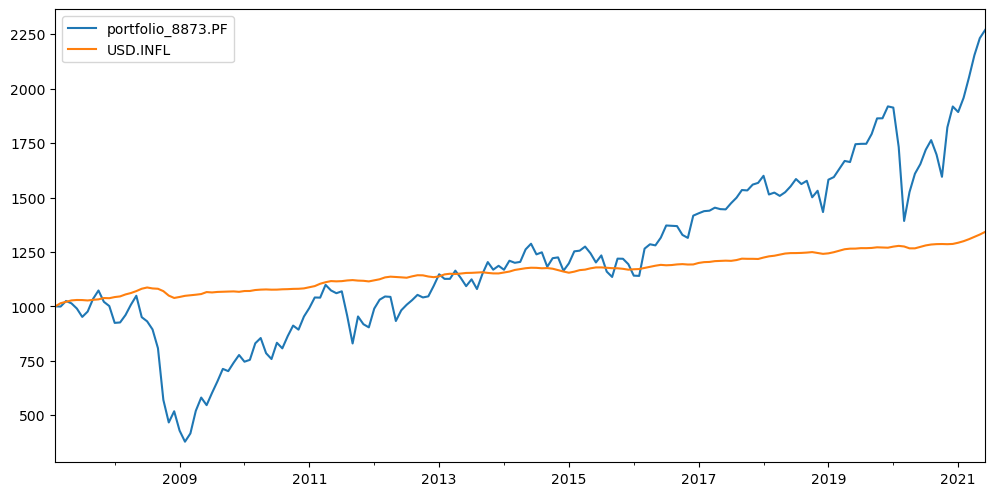

In [24]:
y.wealth_index.plot();

### Risk metrics

You can use risk(volatility or standard deviation), semideviation, max drawdown, var and cvar metrics.

In [25]:
y.risk_annual

0.2337628491873399

In [26]:
y.semideviation_annual

0.18204535267514022

In [27]:
y.get_var_historic(level=1)

0.5520913386571025

In [28]:
y.get_cvar_historic(level=5)

0.5047561855627113

In [29]:
y.drawdowns.min()

-0.6474308140441074

... another useful rist metric is max drawdown recovery period - `.recovery_period`.  
The longest recovery period for the portfolio assets value is returned.

In [30]:
y.recovery_period / 12  # years

3.4166666666666665

`.describe` shows main properties for the portfolio in different trailing periods.

In [31]:
y.describe()

,property,period,portfolio_8873.PF,inflation
0,compound return,YTD,0.183489,0.043147
1,CAGR,1 years,0.373012,0.054032
2,CAGR,5 years,0.115296,0.024272
3,CAGR,10 years,0.079099,0.018740
4,CAGR,"14 years, 5 months",0.058518,0.020629
5,Dividend yield,LTM,0.015638,NaN
6,Risk,"14 years, 5 months",0.233763,NaN
7,CVAR,"14 years, 5 months",0.579034,NaN
8,Max drawdown,"14 years, 5 months",-0.647431,NaN
9,Max drawdown date,"14 years, 5 months",2009-02,NaN


### Forecasting return

Monte Carlo forecast for normal distrubution.  
`.plot_forecast_monte_carlo` plots N random wealth indexes according to given return distribution.

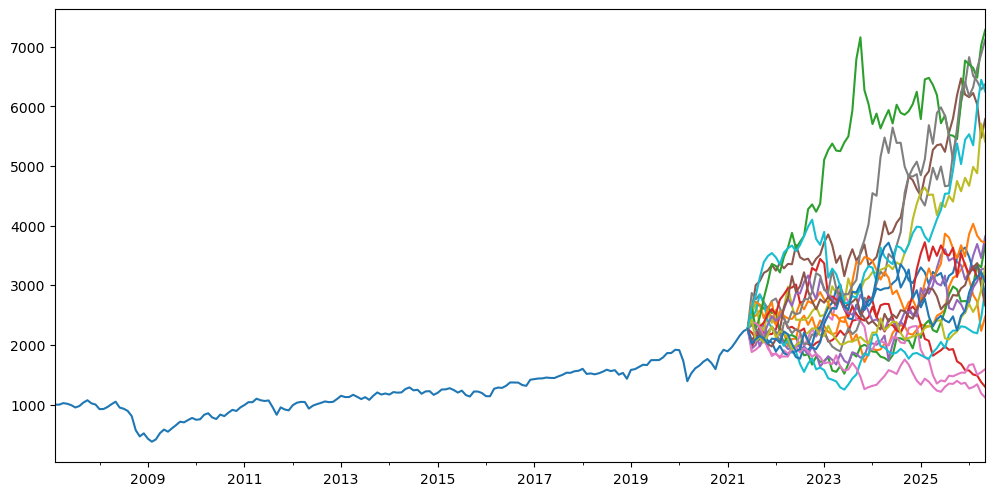

In [32]:
y.plot_forecast_monte_carlo(distr='norm', years=5, n=20)

For normal distribution it's easy to see forecasted accumulated return for a given set of percentiles.

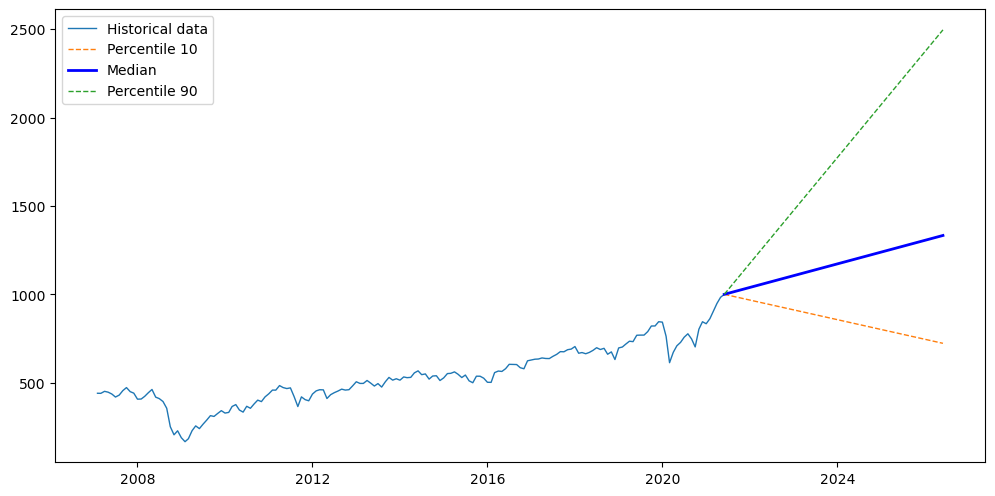

In [33]:
y.plot_forecast(years=5, today_value=1000, percentiles=[10,50,90]);  # lognormal or historical distribution can be used with "distr" argument